# 1. Understand the Data

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mtick
import matplotlib.lines as lines
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [292]:
df=pd.read_csv("SCMS_Delivery_History_Dataset.csv")

### Dataset first View

In [293]:
df.head(10)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
5,23,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,...,240,416,2225.60,5.35,0.02,"Aurobindo Unit III, India",Yes,504,5920.42,NaN
6,44,110-ZM-T01,Pre-PQ Process,SCMS-139,ASN-130,Zambia,PMO - US,Direct Drop,DDU,Air,...,90,135,4374.00,32.40,0.36,MSD South Granville Australia,Yes,328,Freight Included in Commodity Cost,NaN
7,45,109-TZ-T01,Pre-PQ Process,SCMS-140,ASN-94,Tanzania,PMO - US,Direct Drop,EXW,Air,...,60,16667,60834.55,3.65,0.06,"Aurobindo Unit III, India",Yes,1478,6212.41,NaN
8,46,112-NG-T01,Pre-PQ Process,SCMS-156,ASN-93,Nigeria,PMO - US,Direct Drop,EXW,Air,...,60,273,532.35,1.95,0.03,"Aurobindo Unit III, India",No,See ASN-93 (ID#:1281),See ASN-93 (ID#:1281),NaN
9,47,110-ZM-T01,Pre-PQ Process,SCMS-165,ASN-199,Zambia,PMO - US,Direct Drop,CIP,Air,...,120,2800,115080.00,41.10,0.34,ABBVIE (Abbott) St. P'burg USA,Yes,643,Freight Included in Commodity Cost,NaN


### Dataset Rows & Columns count

In [204]:
print("Number of Rows :",df.shape[0])
print("Number of Colums :",df.shape[1])

Number of Rows : 10324
Number of Colums : 33


### Dataset Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

### Duplicate Values

In [10]:
# Duplicates value count
df.duplicated().sum()

0

### Missing Values/Null values 

In [11]:
df.isna().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [294]:
# visulizaing the missing values
def apply_chart_styling(ax,fig,title,subtitle,insight_text,logo_path="United_Parcel_Service-Logo.wine.png"):
    fig.patch.set_facecolor('#f7f7f7') # Background colors
    ax.set_facecolor('#f7f7f7')

    fig.text(0.3,1.05,title,fontsize=30,fontweight='bold',fontfamily="Franklin Gothic Heavy")
    fig.text(0.25,0.99,subtitle,fontsize=25,fontweight='bold',fontfamily='Segoe UI')

    fig.text(1.1,1.01,'Insight',fontsize=18,fontweight='bold',fontfamily="Segoe UI")
    fig.text(1.1,0.50,insight_text,fontsize=18,fontweight='light',fontfamily='Arial Rounded MT Bold')

    logo=mpimg.imread(logo_path)
    logo_ax= fig.add_axes([1.5,0.85,0.2,0.2])
    logo_ax.imshow(logo)
    logo_ax.axis('off')

    ax.grid(axis='y',linestyle='-',alpha=0.4)
    ax.set_axisbelow('True')

    for spine in ['top','right','left']:
        ax.spines[spine].set_visible(False)

    ax.tick_params(axis = 'both',which = 'major', labelsize = 12)

    l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
    fig.lines.extend([l1])

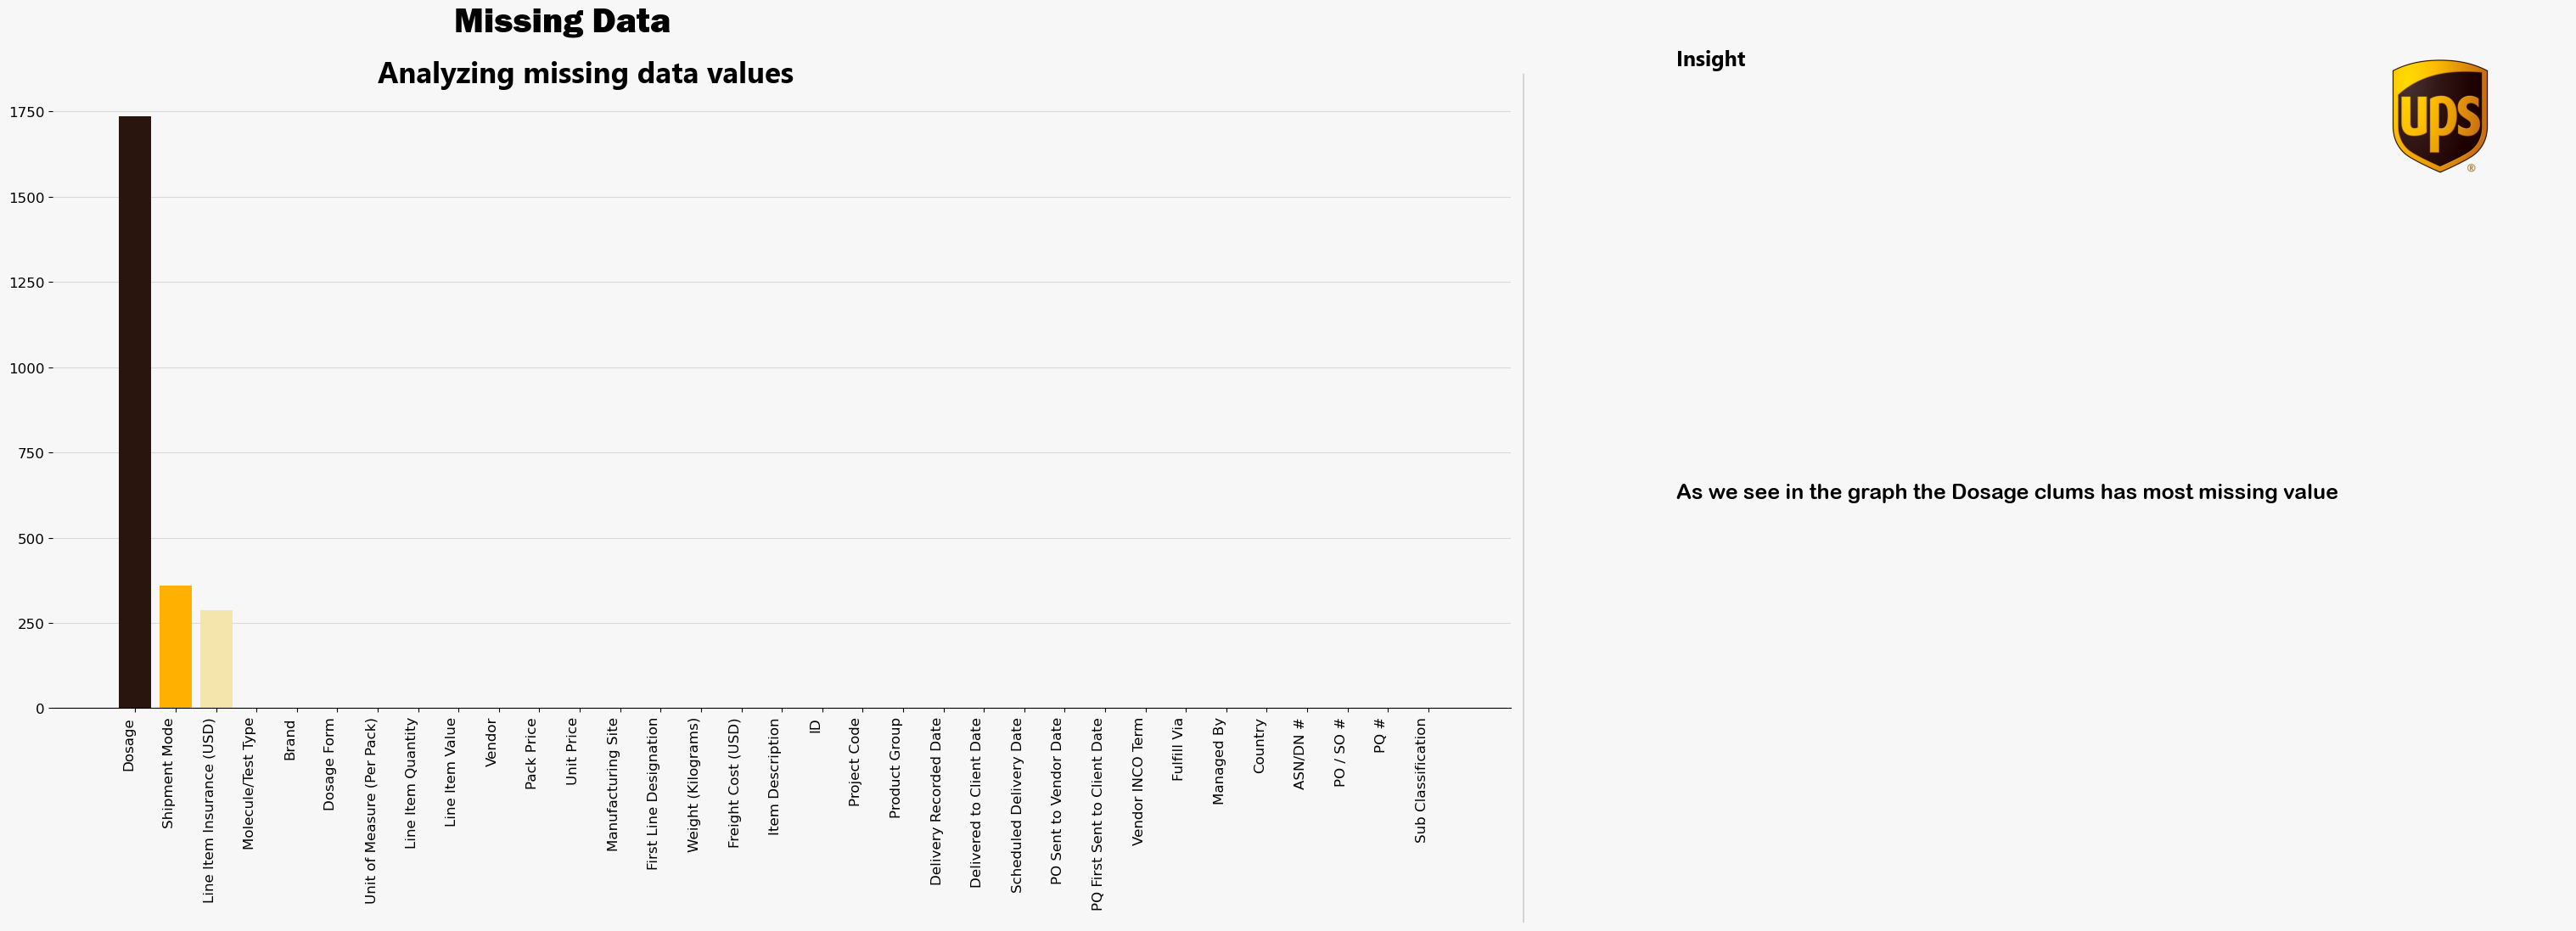

In [298]:
palette = ["#2A150E", "#FFB000", "#F3E5AB", "#FFF8E1", "#4E4E4E", "#FFE082"]

missing_data = df.isnull().sum().sort_values(ascending = False)

fig,ax = plt.subplots(1,1,figsize=(18,10))

bars = ax.bar(missing_data.index,missing_data.values,color = palette)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, ha = 'right')

apply_chart_styling(ax = ax, fig = fig, title = 'Missing Data' , subtitle = 'Analyzing missing data values', insight_text = 'As we see in the graph the Dosage clums has most missing value')

plt.tight_layout()
plt.show()

## 2. Understanding Your Variables

In [67]:
# Dataset colummns
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

### Describe Dataset

In [68]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


### Check unique Value for each column

In [72]:
for col in df.columns:
    print(f"{col} : {df[col].nunique()}")

ID : 10324
Project Code : 142
PQ # : 1237
PO / SO # : 6233
ASN/DN # : 7030
Country : 43
Managed By : 4
Fulfill Via : 2
Vendor INCO Term : 8
Shipment Mode : 4
PQ First Sent to Client Date : 765
PO Sent to Vendor Date : 897
Scheduled Delivery Date : 2006
Delivered to Client Date : 2093
Delivery Recorded Date : 2042
Product Group : 5
Sub Classification : 6
Vendor : 73
Item Description : 184
Molecule/Test Type : 86
Brand : 48
Dosage : 54
Dosage Form : 17
Unit of Measure (Per Pack) : 31
Line Item Quantity : 5065
Line Item Value : 8741
Pack Price : 1175
Unit Price : 183
Manufacturing Site : 88
First Line Designation : 2
Weight (Kilograms) : 4688
Freight Cost (USD) : 6733
Line Item Insurance (USD) : 6722


## 3. Data wrangling

In [205]:
fed_ex = df[[
    'Country',
    'Managed By',
    'Fulfill Via',
    'Shipment Mode',
    'PQ First Sent to Client Date',
    'PO Sent to Vendor Date',
    'Scheduled Delivery Date',
    'Delivered to Client Date',
    'Delivery Recorded Date',
    'Line Item Quantity',
    'Line Item Value',
    'Weight (Kilograms)',
    'Freight Cost (USD)',
    'Vendor',
    'Line Item Insurance (USD)'
]]
fed_ex.head()

,Country,Managed By,Fulfill Via,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Line Item Quantity,Line Item Value,Weight (Kilograms),Freight Cost (USD),Vendor,Line Item Insurance (USD)
0,Côte d'Ivoire,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,19,551.0,13,780.34,RANBAXY Fine Chemicals LTD.,NaN
1,Vietnam,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,1000,6200.0,358,4521.5,Aurobindo Pharma Limited,NaN
2,Côte d'Ivoire,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,500,40000.0,171,1653.78,Abbott GmbH & Co. KG,NaN
3,Vietnam,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,31920,127360.8,1855,16007.06,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,NaN
4,Vietnam,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,38000,121600.0,7590,45450.08,Aurobindo Pharma Limited,NaN


### Handle missing values in this

In [206]:
fed_ex.isna().sum()

Country                           0
Managed By                        0
Fulfill Via                       0
Shipment Mode                   360
PQ First Sent to Client Date      0
PO Sent to Vendor Date            0
Scheduled Delivery Date           0
Delivered to Client Date          0
Delivery Recorded Date            0
Line Item Quantity                0
Line Item Value                   0
Weight (Kilograms)                0
Freight Cost (USD)                0
Vendor                            0
Line Item Insurance (USD)       287
dtype: int64

In [207]:
ship_mode=fed_ex["Shipment Mode"].mode()[0]
fed_ex["Shipment Mode"].fillna(ship_mode,inplace=True)

fed_ex["Line Item Insurance (USD)"].fillna(0,inplace=True)

### Handle Duplicates

In [208]:
fed_ex.drop_duplicates(inplace=True)

### Check type of each column

In [299]:
fed_ex.dtypes

Country                          object
Managed By                       object
Fulfill Via                      object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Line Item Quantity                int64
Line Item Value                 float64
Weight (Kilograms)              float64
Freight Cost (USD)              float64
Vendor                           object
Line Item Insurance (USD)       float64
dtype: object

### Handle Date columns

In [301]:
date_cols=["PO Sent to Vendor Date","PQ First Sent to Client Date","Scheduled Delivery Date","Delivered to Client Date","Delivery Recorded Date"]
for col in date_cols:
    fed_ex[col]=pd.to_datetime(fed_ex[col],errors='coerce')

### Handle Numeric Columns

In [302]:
num_cols=["Weight (Kilograms)","Freight Cost (USD)","Line Item Insurance (USD)","Line Item Quantity","Line Item Value"]
for col in num_cols:
    fed_ex[col]=pd.to_numeric(fed_ex[col],errors="coerce")

In [303]:
fed_ex["Country"]=fed_ex["Country"].str.strip().str.lower()

In [304]:
# Check Cleaned Data
fed_ex.dtypes

Country                                 object
Managed By                              object
Fulfill Via                             object
Shipment Mode                           object
PQ First Sent to Client Date    datetime64[ns]
PO Sent to Vendor Date          datetime64[ns]
Scheduled Delivery Date         datetime64[ns]
Delivered to Client Date        datetime64[ns]
Delivery Recorded Date          datetime64[ns]
Line Item Quantity                       int64
Line Item Value                        float64
Weight (Kilograms)                     float64
Freight Cost (USD)                     float64
Vendor                                  object
Line Item Insurance (USD)              float64
dtype: object

## 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

## Univariate Analysis

### Count shipment by country

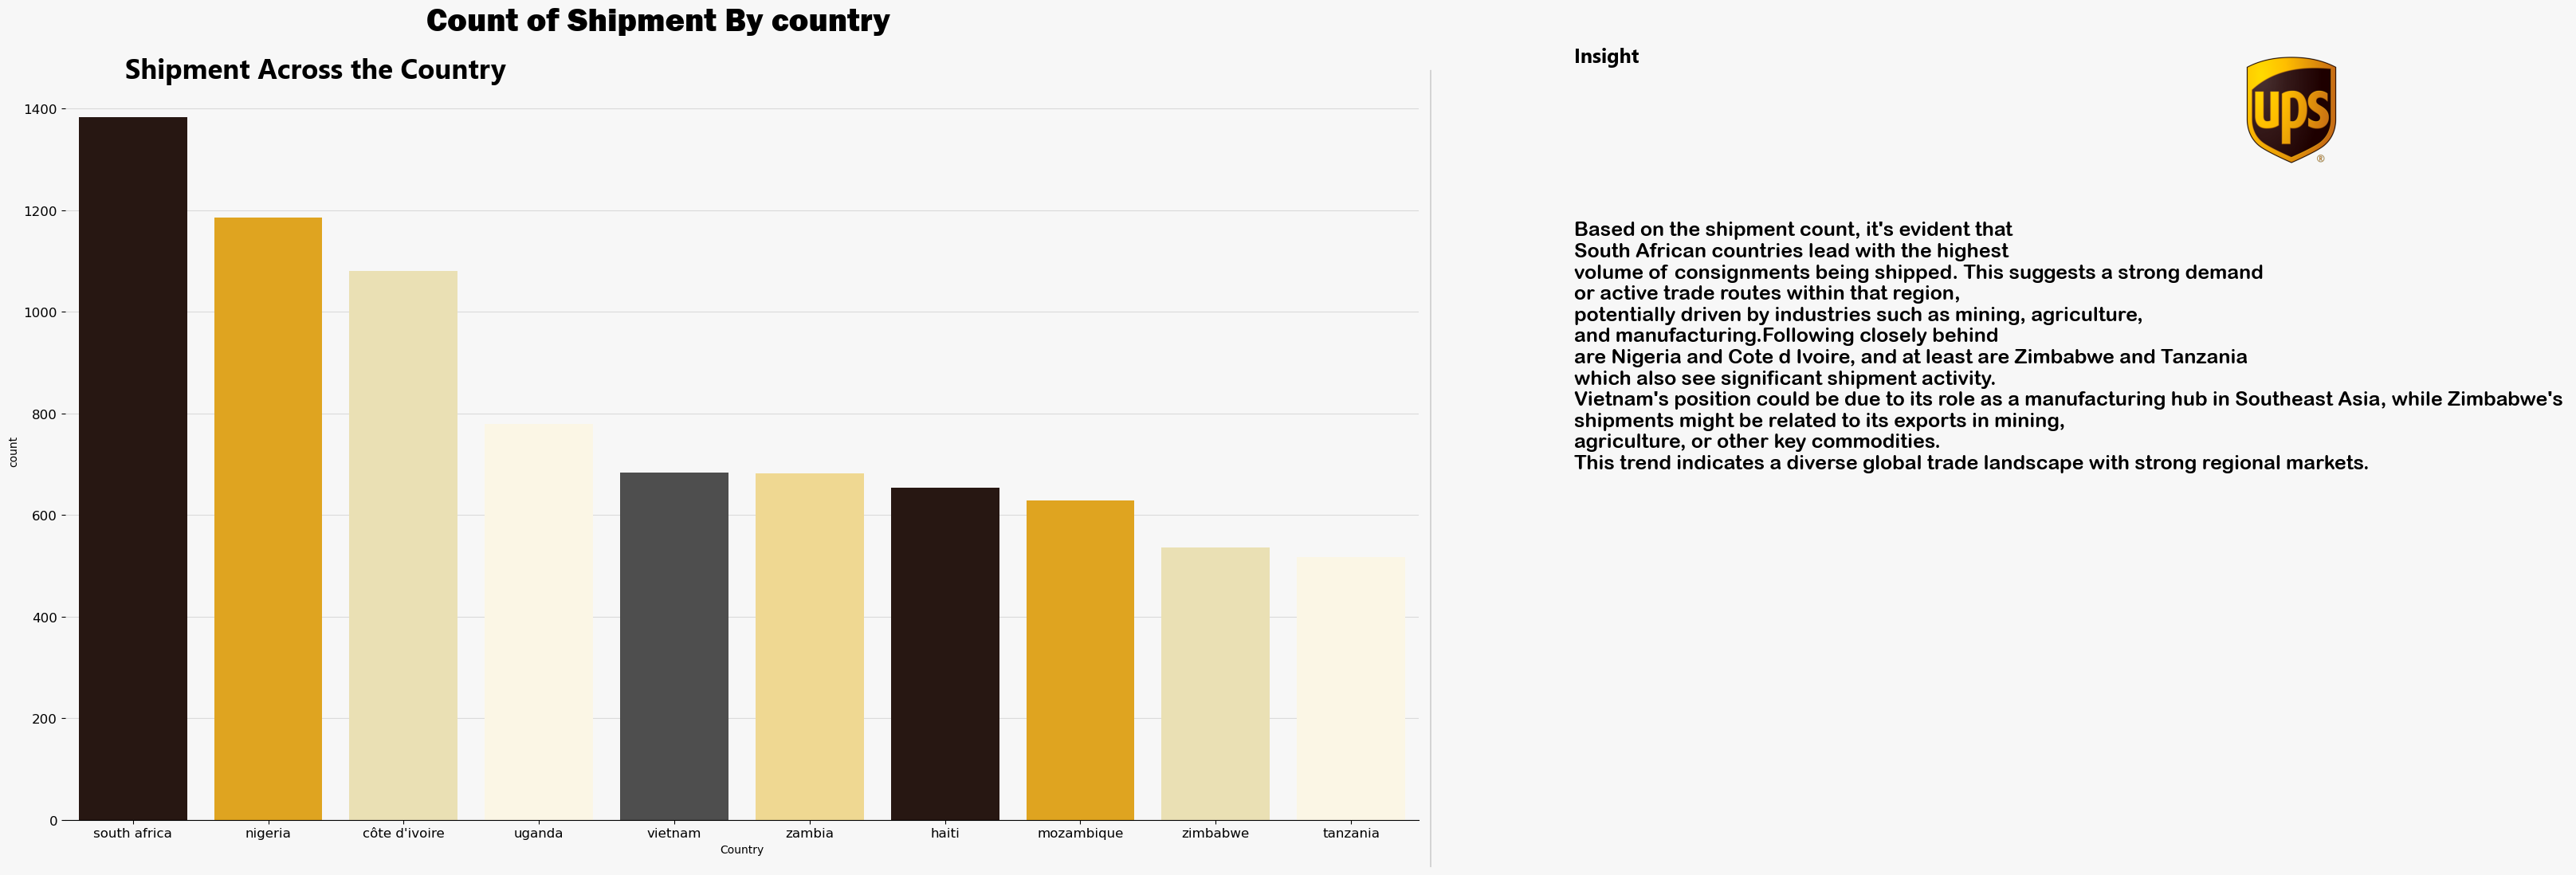

In [269]:
fig,ax=plt.subplots(1,1,figsize=(18,10))
# plot count plot
sns.countplot(x="Country",order=fed_ex["Country"].value_counts().nlargest(10).index, data=fed_ex,palette=palette)
# apply chart styling
apply_chart_styling(ax=ax,fig=fig,title="Count of Shipment By country",subtitle='Shipment Across the Country',insight_text='''Based on the shipment count, it's evident that 
South African countries lead with the highest 
volume of consignments being shipped. This suggests a strong demand 
or active trade routes within that region, 
potentially driven by industries such as mining, agriculture, 
and manufacturing.Following closely behind 
are Nigeria and Cote d Ivoire, and at least are Zimbabwe and Tanzania
which also see significant shipment activity. 
Vietnam's position could be due to its role as a manufacturing hub in Southeast Asia, while Zimbabwe's 
shipments might be related to its exports in mining, 
agriculture, or other key commodities. 
This trend indicates a diverse global trade landscape with strong regional markets.''')
plt.tight_layout()
plt.show()

### Distribution of shipment modes

In [213]:
ship_mode_counts=fed_ex["Shipment Mode"].value_counts()

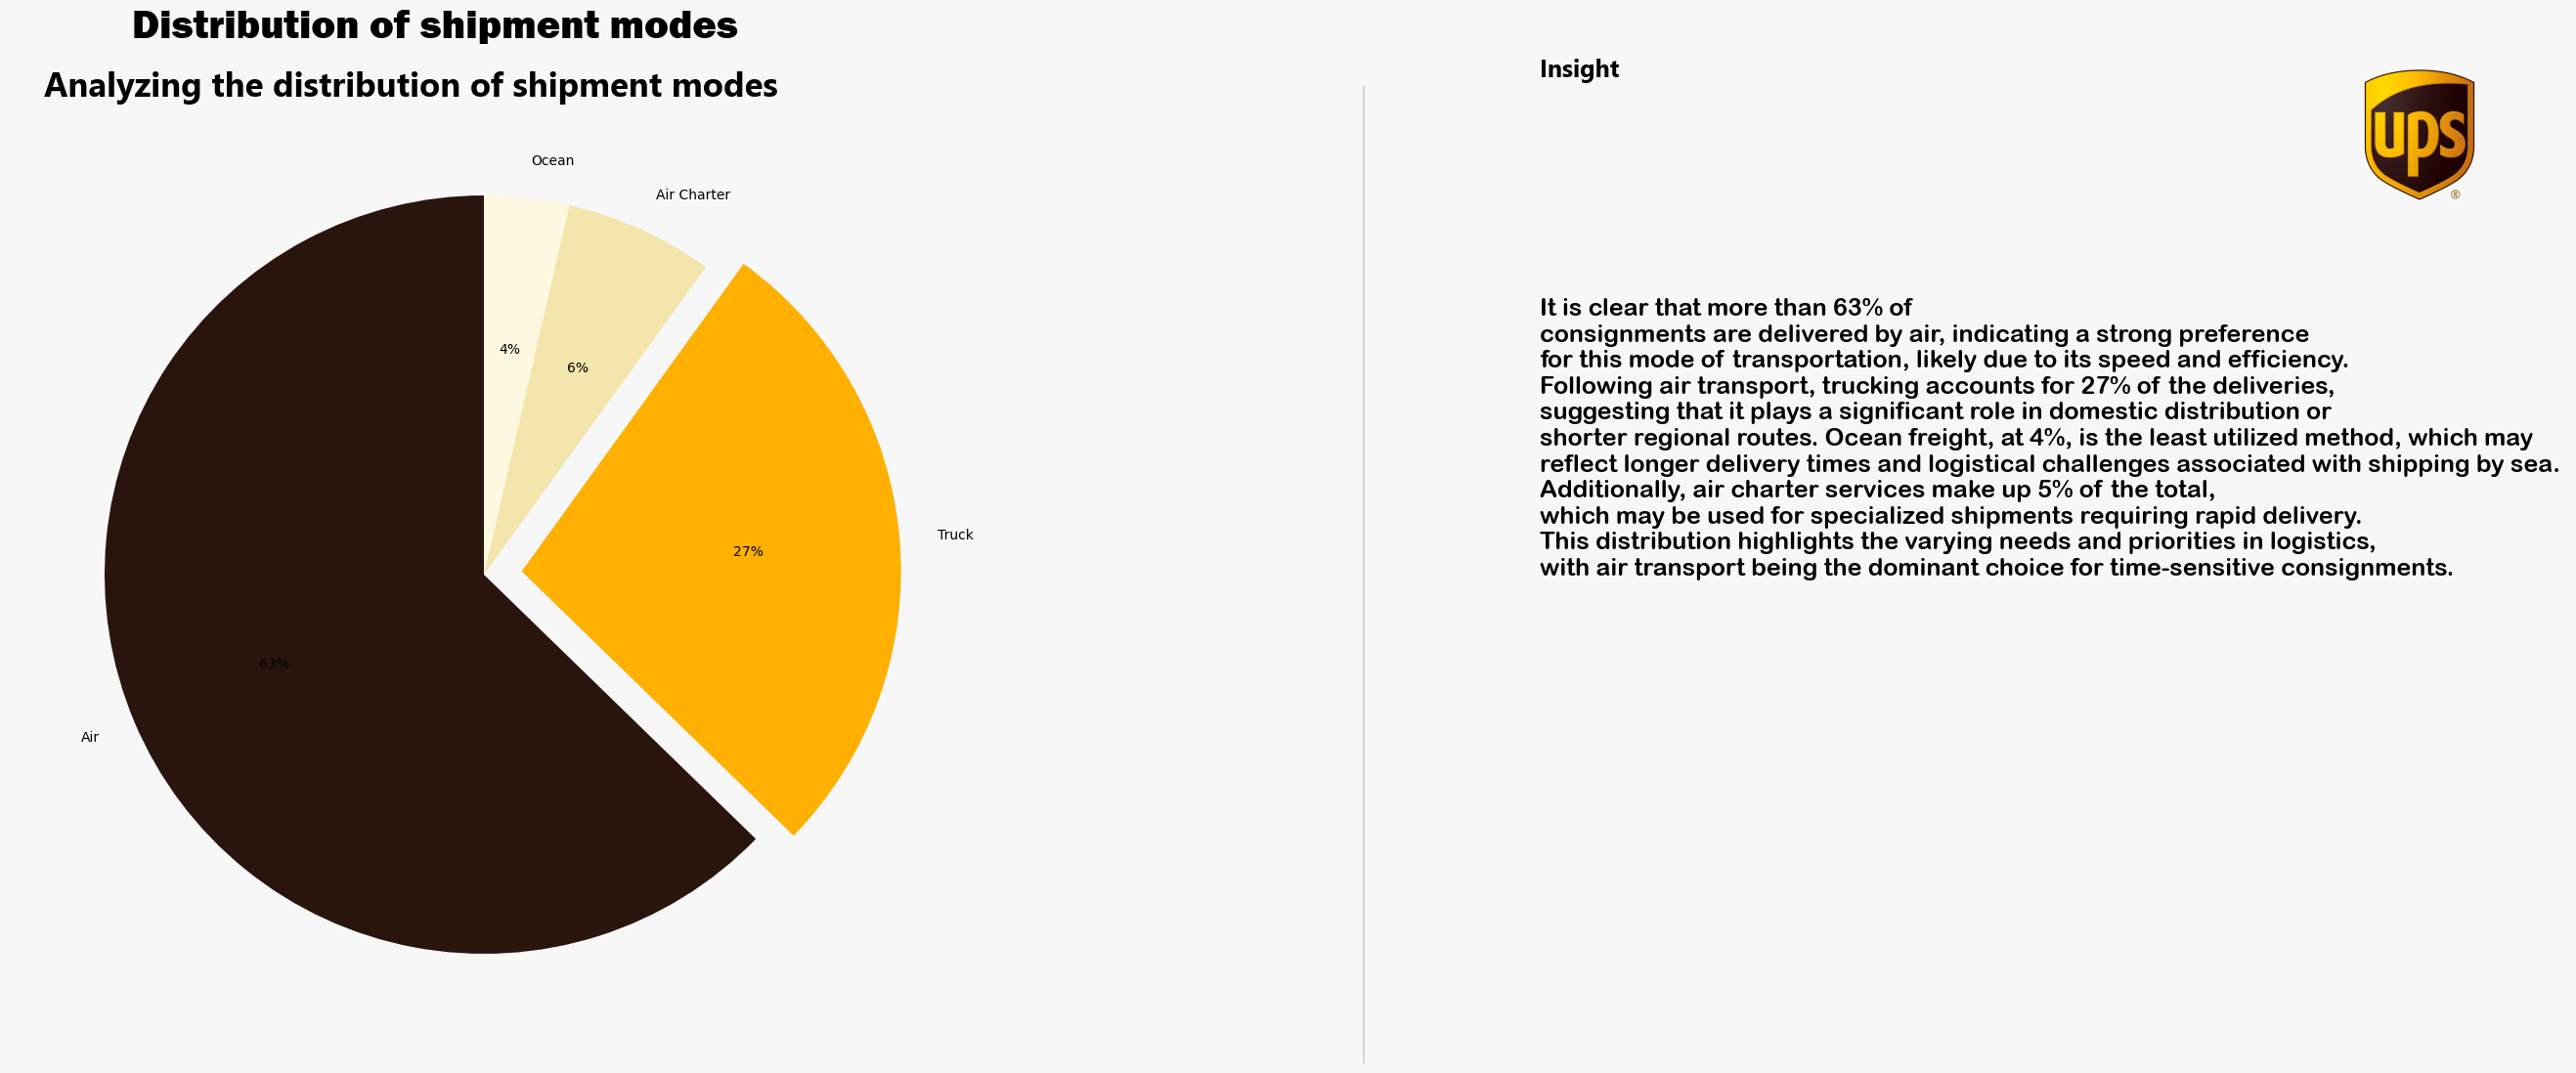

In [305]:
# create a pie chart
fig,ax=plt.subplots(figsize=(18,10))
explode = [0.1 if i == 1 else 0 for i in range(len(ship_mode_counts))]
# plot the pie chart
ax.pie(ship_mode_counts,labels=ship_mode_counts.index,colors=palette,autopct="%.0f%%",explode=explode,startangle=90)
# Apply chart styling
apply_chart_styling(ax=ax,fig=fig,title="Distribution of shipment modes",subtitle='Analyzing the distribution of shipment modes',insight_text='''
It is clear that more than 63% of
consignments are delivered by air, indicating a strong preference 
for this mode of transportation, likely due to its speed and efficiency. 
Following air transport, trucking accounts for 27% of the deliveries, 
suggesting that it plays a significant role in domestic distribution or 
shorter regional routes. Ocean freight, at 4%, is the least utilized method, which may 
reflect longer delivery times and logistical challenges associated with shipping by sea. 
Additionally, air charter services make up 5% of the total, 
which may be used for specialized shipments requiring rapid delivery. 
This distribution highlights the varying needs and priorities in logistics,
with air transport being the dominant choice for time-sensitive consignments.''')
plt.tight_layout()
plt.show()

### Average Freight Cost

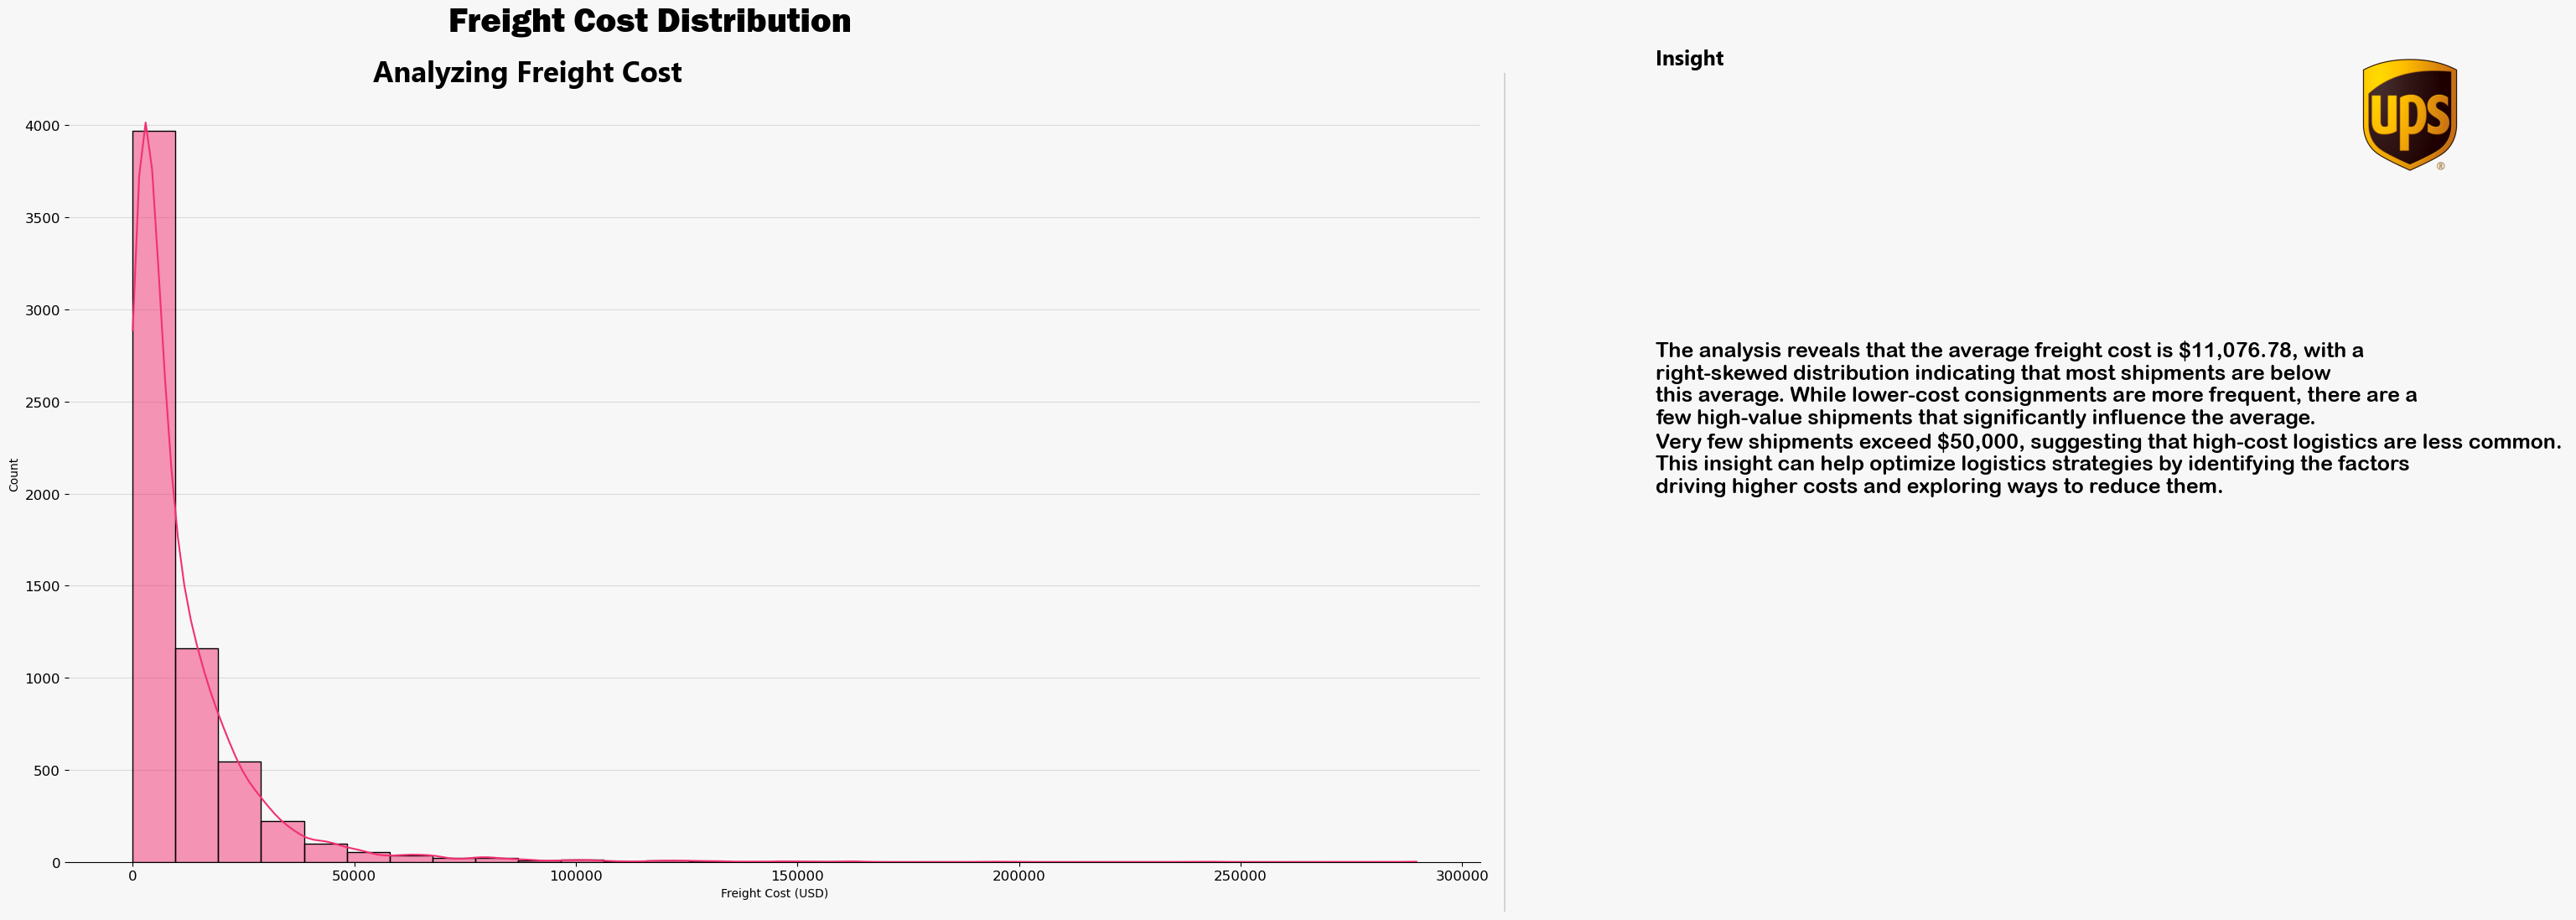

In [286]:
# Average Freight cost
fed_ex["Freight Cost (USD)"].mean()
# creating figure and axis
fig,ax=plt.subplots(1,1,figsize=(18,10))

# plotting histogram
sns.histplot(x="Freight Cost (USD)",data=fed_ex,kde=True,ax=ax,bins=30,color="#f23071")
apply_chart_styling(ax=ax,fig=fig,title='Freight Cost Distribution',subtitle='Analyzing Freight Cost',insight_text='''The analysis reveals that the average freight cost is $11,076.78, with a 
right-skewed distribution indicating that most shipments are below 
this average. While lower-cost consignments are more frequent, there are a 
few high-value shipments that significantly influence the average. 
Very few shipments exceed $50,000, suggesting that high-cost logistics are less common. 
This insight can help optimize logistics strategies by identifying the factors 
driving higher costs and exploring ways to reduce them.''')

plt.tight_layout()
plt.show()

### Line Item Quantity Distribution

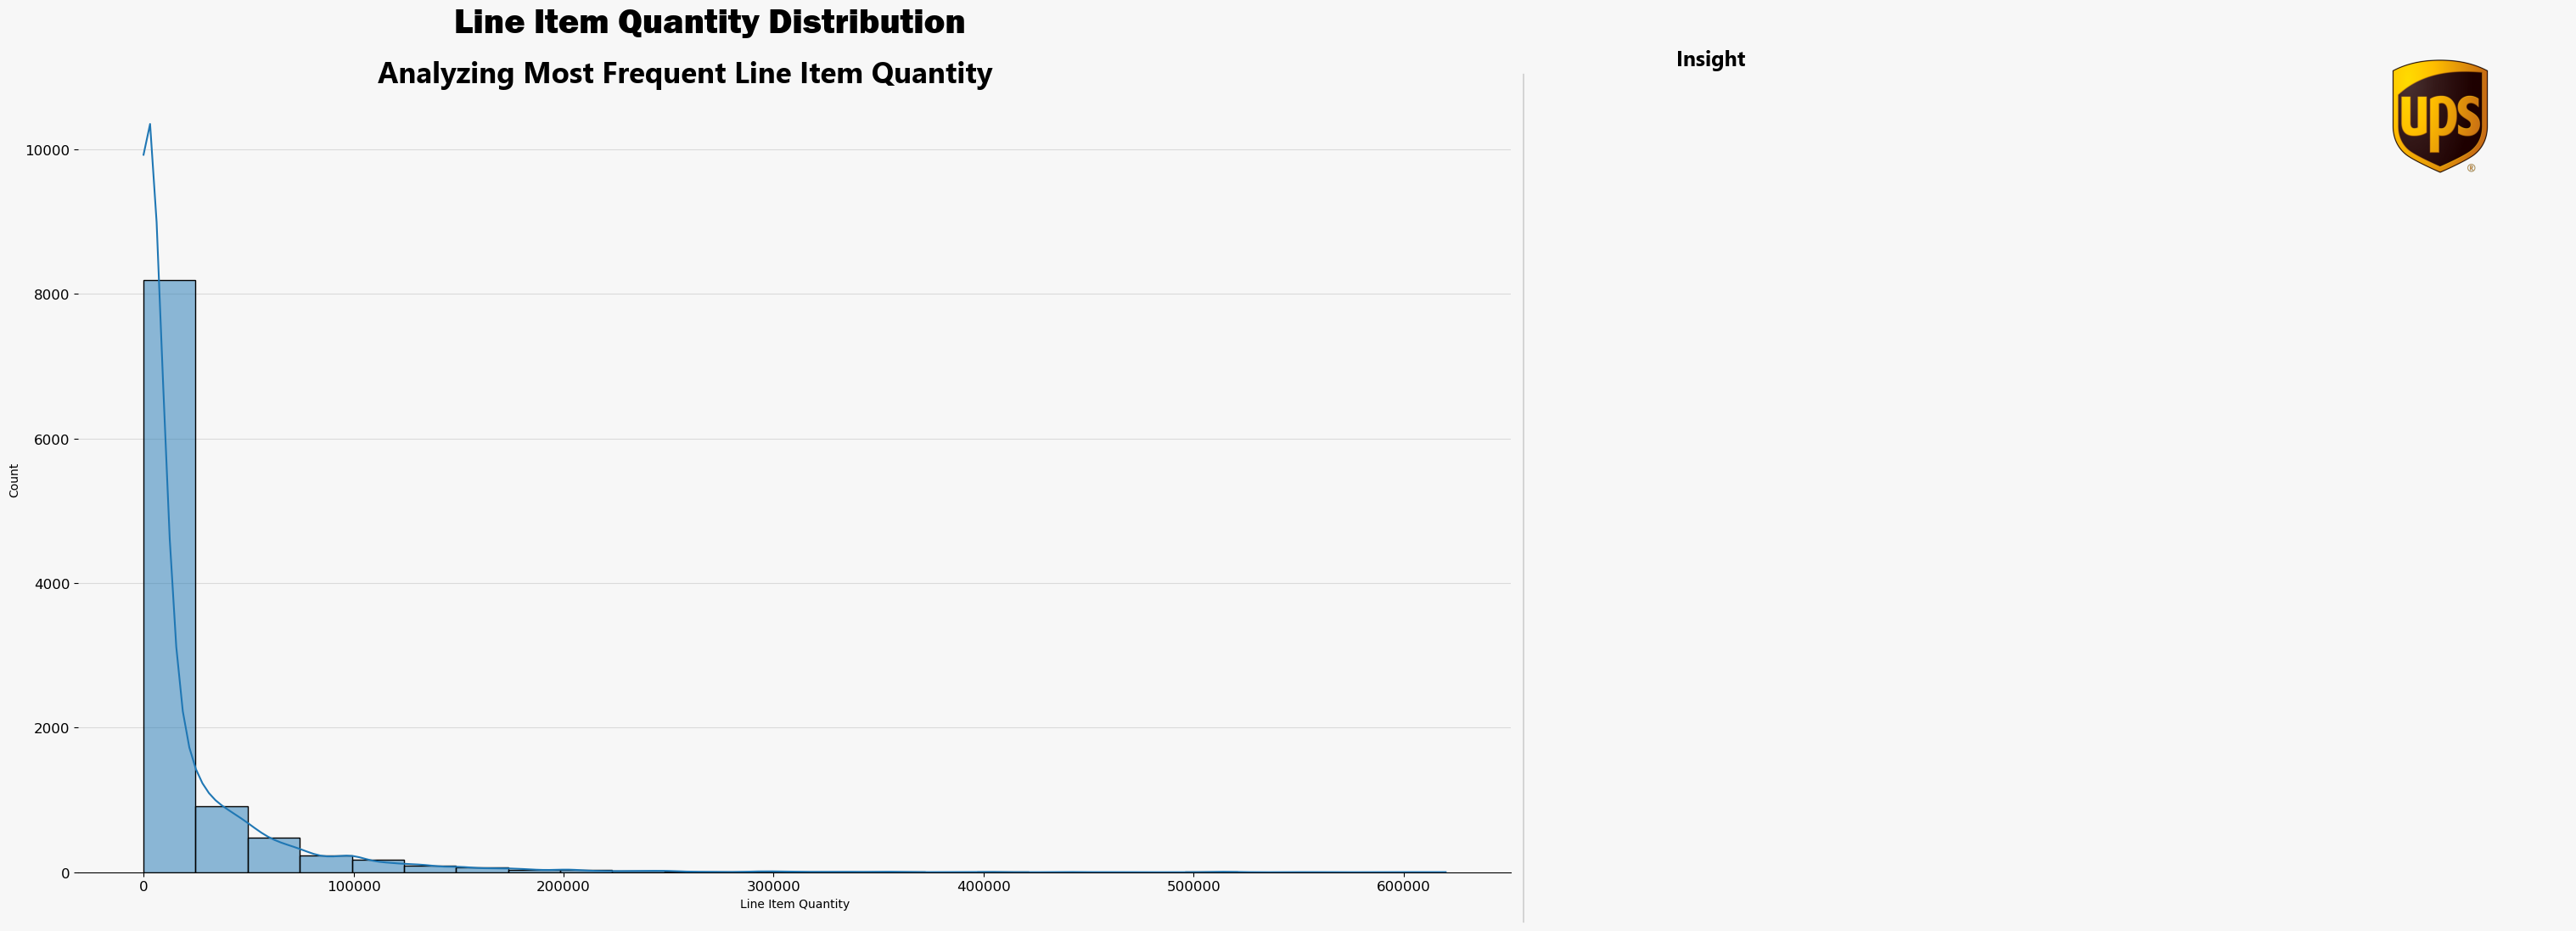

In [287]:
Line_Item_Quantity=fed_ex["Line Item Quantity"].value_counts()
# creating axis and figure struucture
fig,ax=plt.subplots(1,1,figsize=(18,10))
# plotting hist plot
sns.histplot(x="Line Item Quantity",data=fed_ex,ax=ax,kde=True,bins=25)
# appling styling to chart
apply_chart_styling(ax=ax,fig=fig,title="Line Item Quantity Distribution",subtitle="Analyzing Most Frequent Line Item Quantity",insight_text="")

plt.tight_layout()
plt.show()

### Weight Distribution (Kilograms)

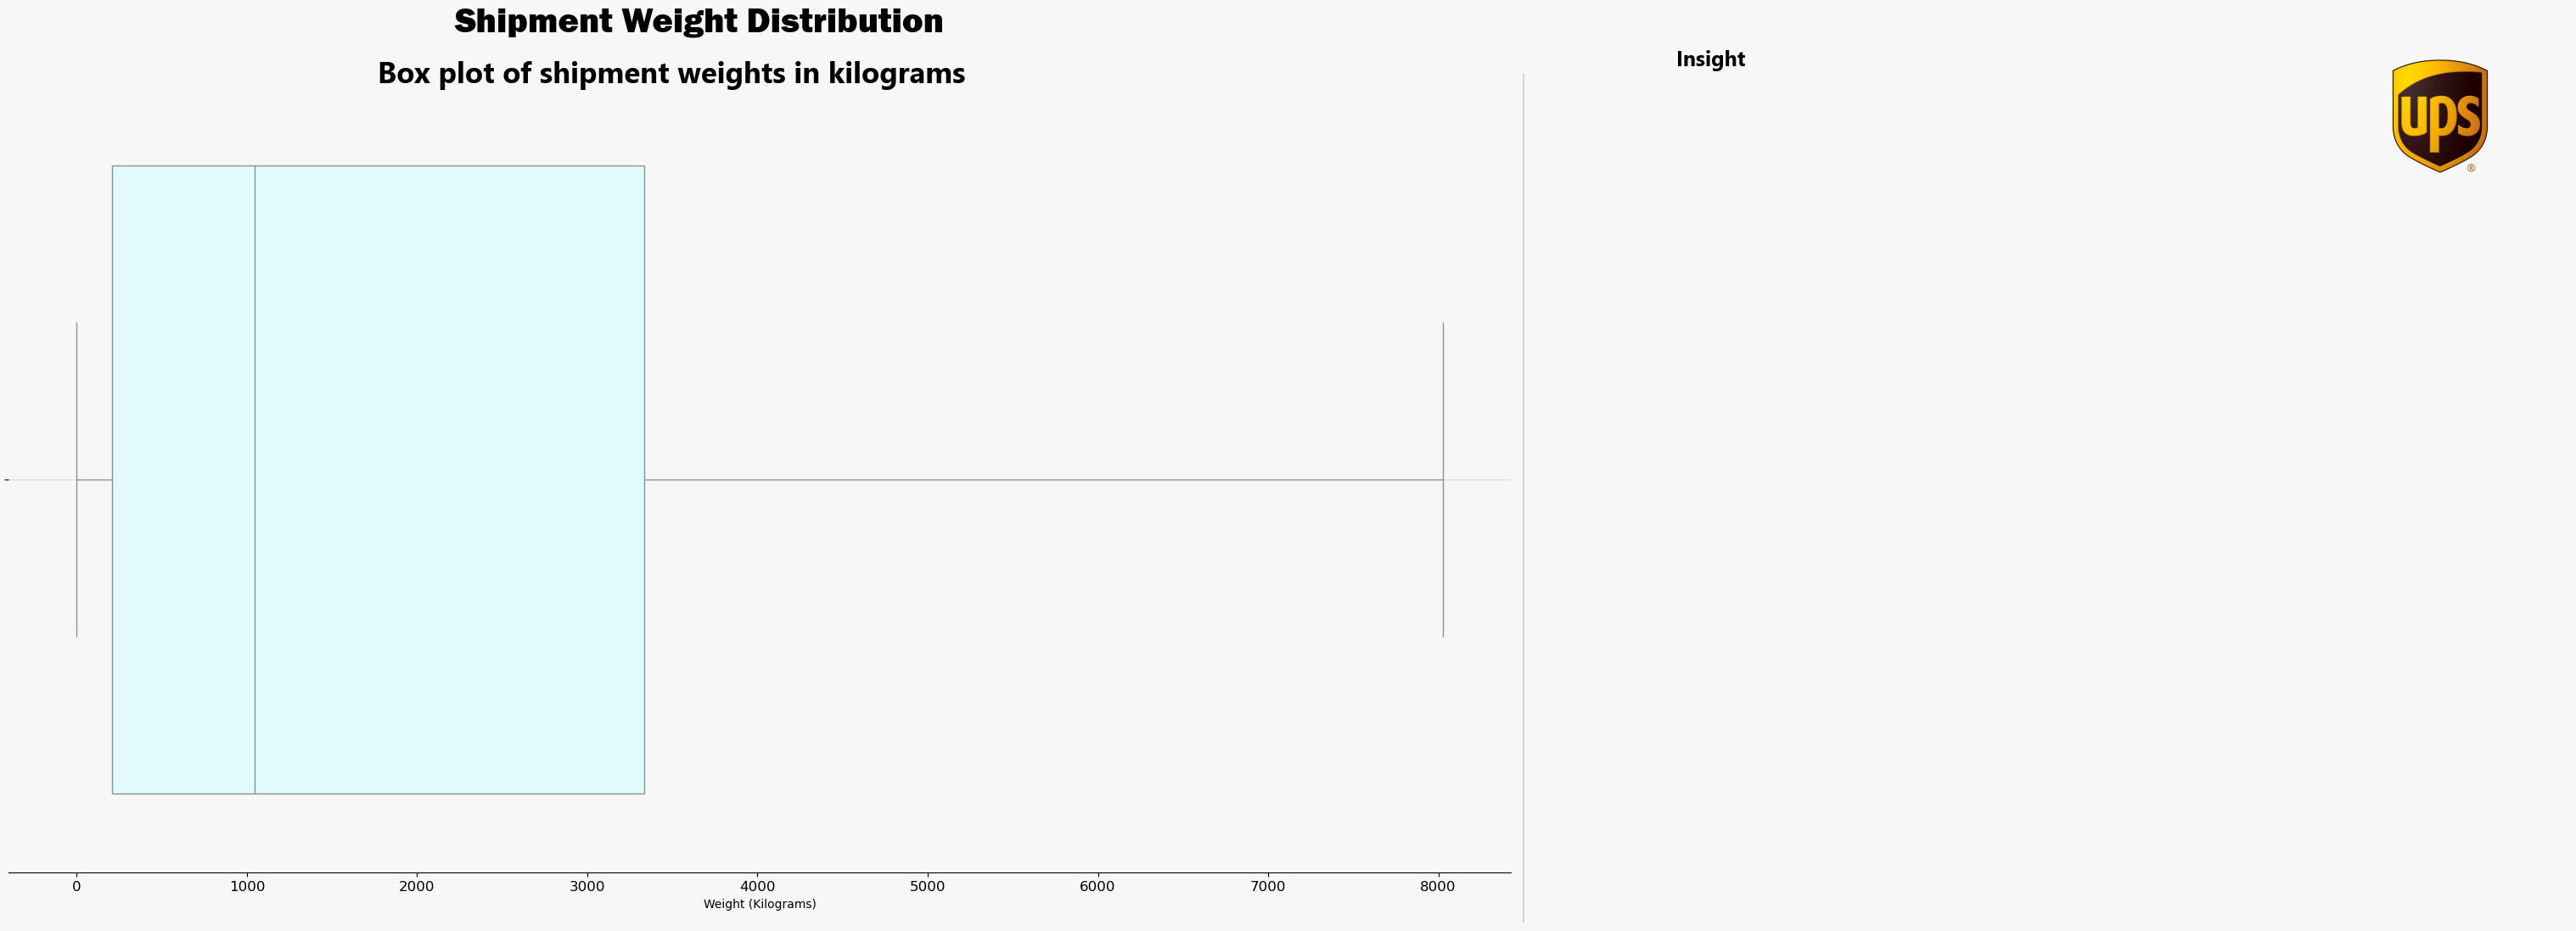

In [289]:
# creting strucure
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
sns.boxplot(x='Weight (Kilograms)', data=fed_ex, ax=ax, color='#ddfeff',showfliers = False)
# Adding chart styling
apply_chart_styling(ax=ax, fig=fig, title='Shipment Weight Distribution', subtitle='Box plot of shipment weights in kilograms',insight_text=''' ''')

# Adjusting layout
plt.tight_layout()
plt.show()

### Vendors with highest orders

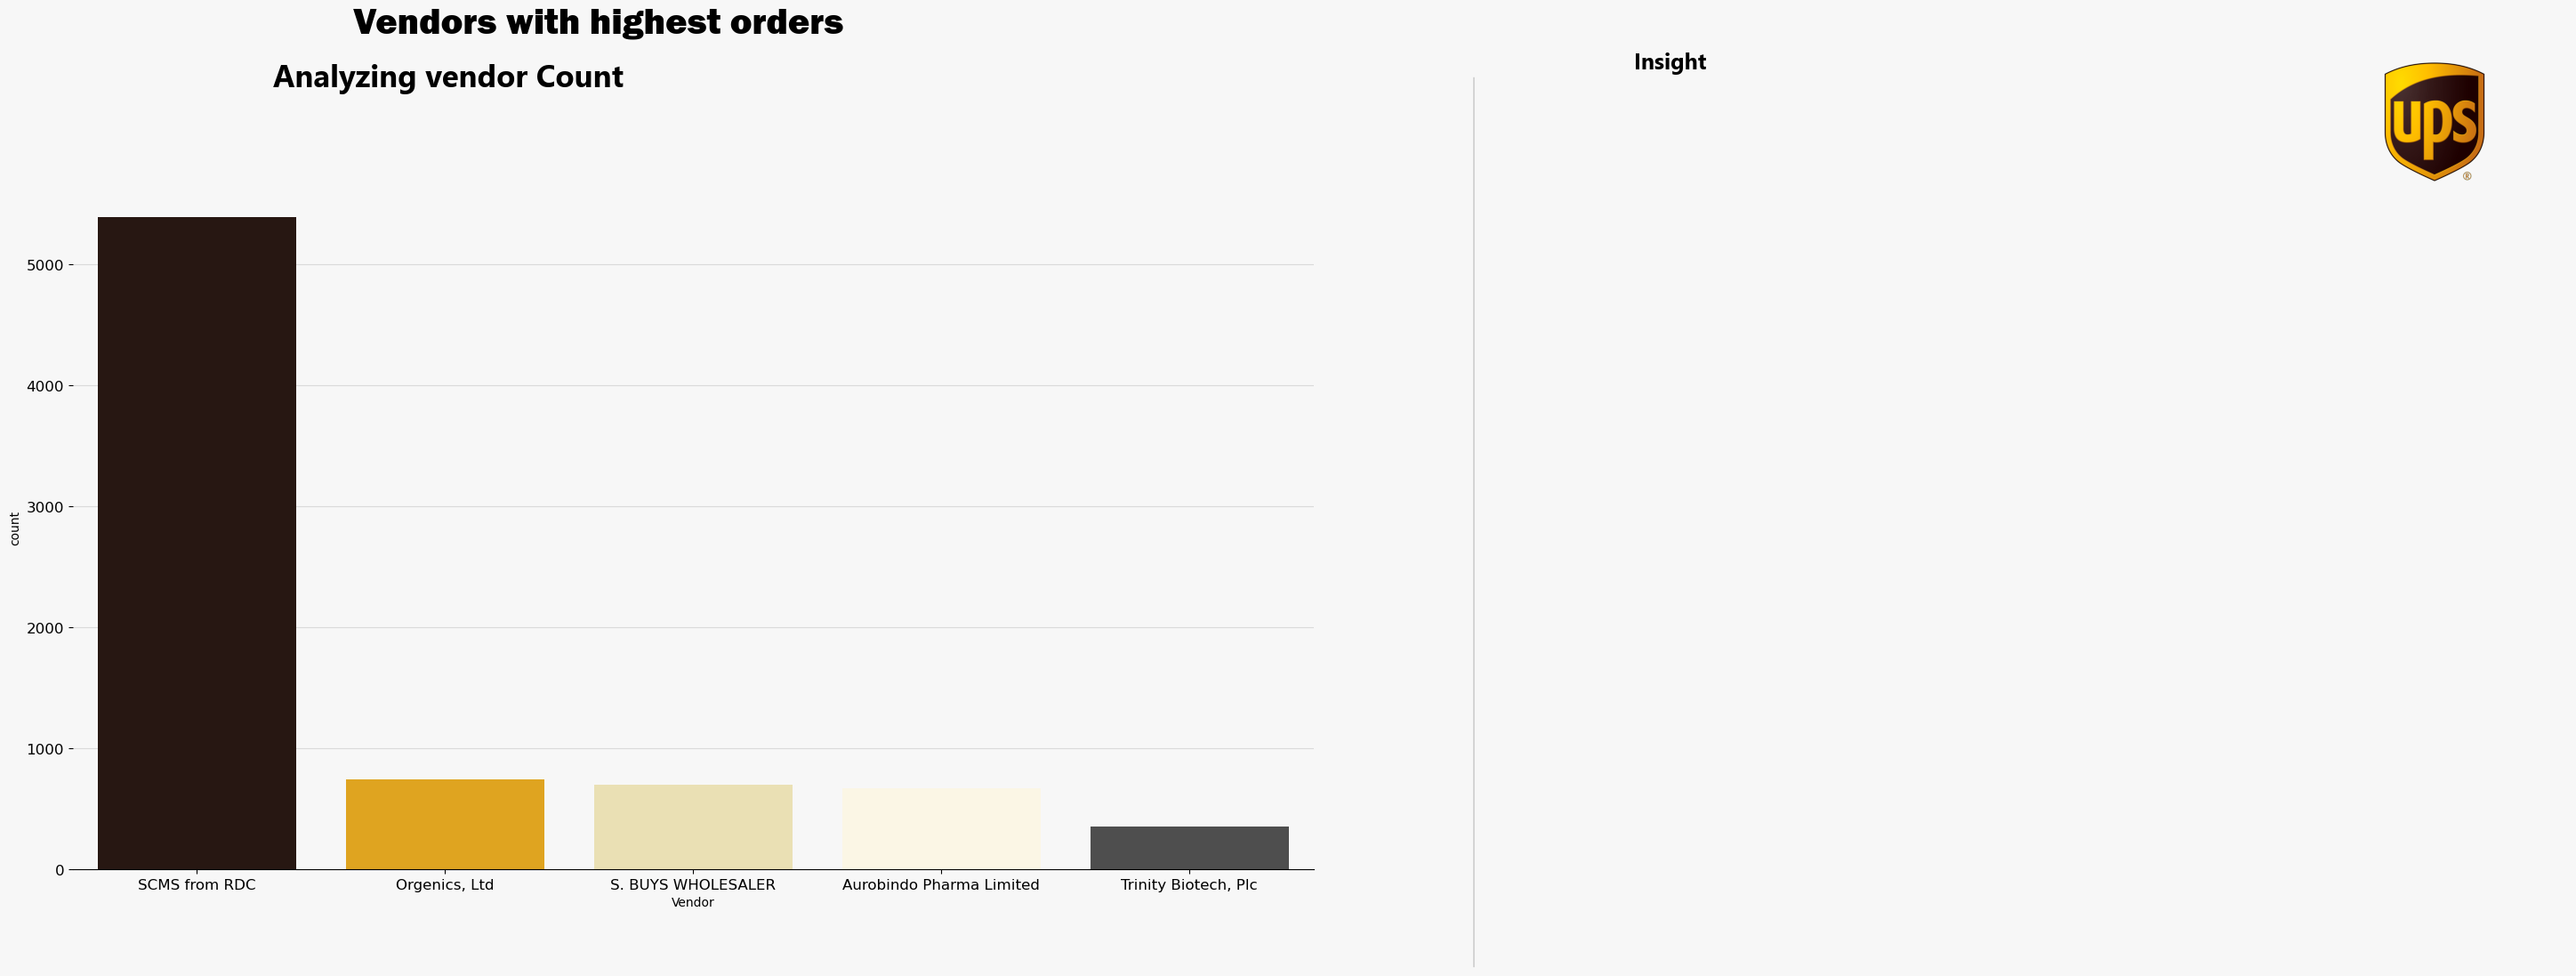

In [288]:
fig,ax=plt.subplots(1,1,figsize=(18,10))
sns.countplot(data=fed_ex,x="Vendor",order=fed_ex["Vendor"].value_counts().nlargest(5).index,palette=palette)
apply_chart_styling(ax=ax, fig=fig, title='Vendors with highest orders', subtitle='Analyzing vendor Count', insight_text='''''')


# Bi-Variate Analysis

### Average weight by shipment mode

In [315]:
avg_weight_by_mode=fed_ex.groupby('Shipment Mode')['Weight (Kilograms)'].mean().reset_index()
avg_weight_by_mode

,Shipment Mode,Weight (Kilograms)
0,Air,1975.031043
1,Air Charter,6951.479675
2,Ocean,6877.386525
3,Truck,6523.084803


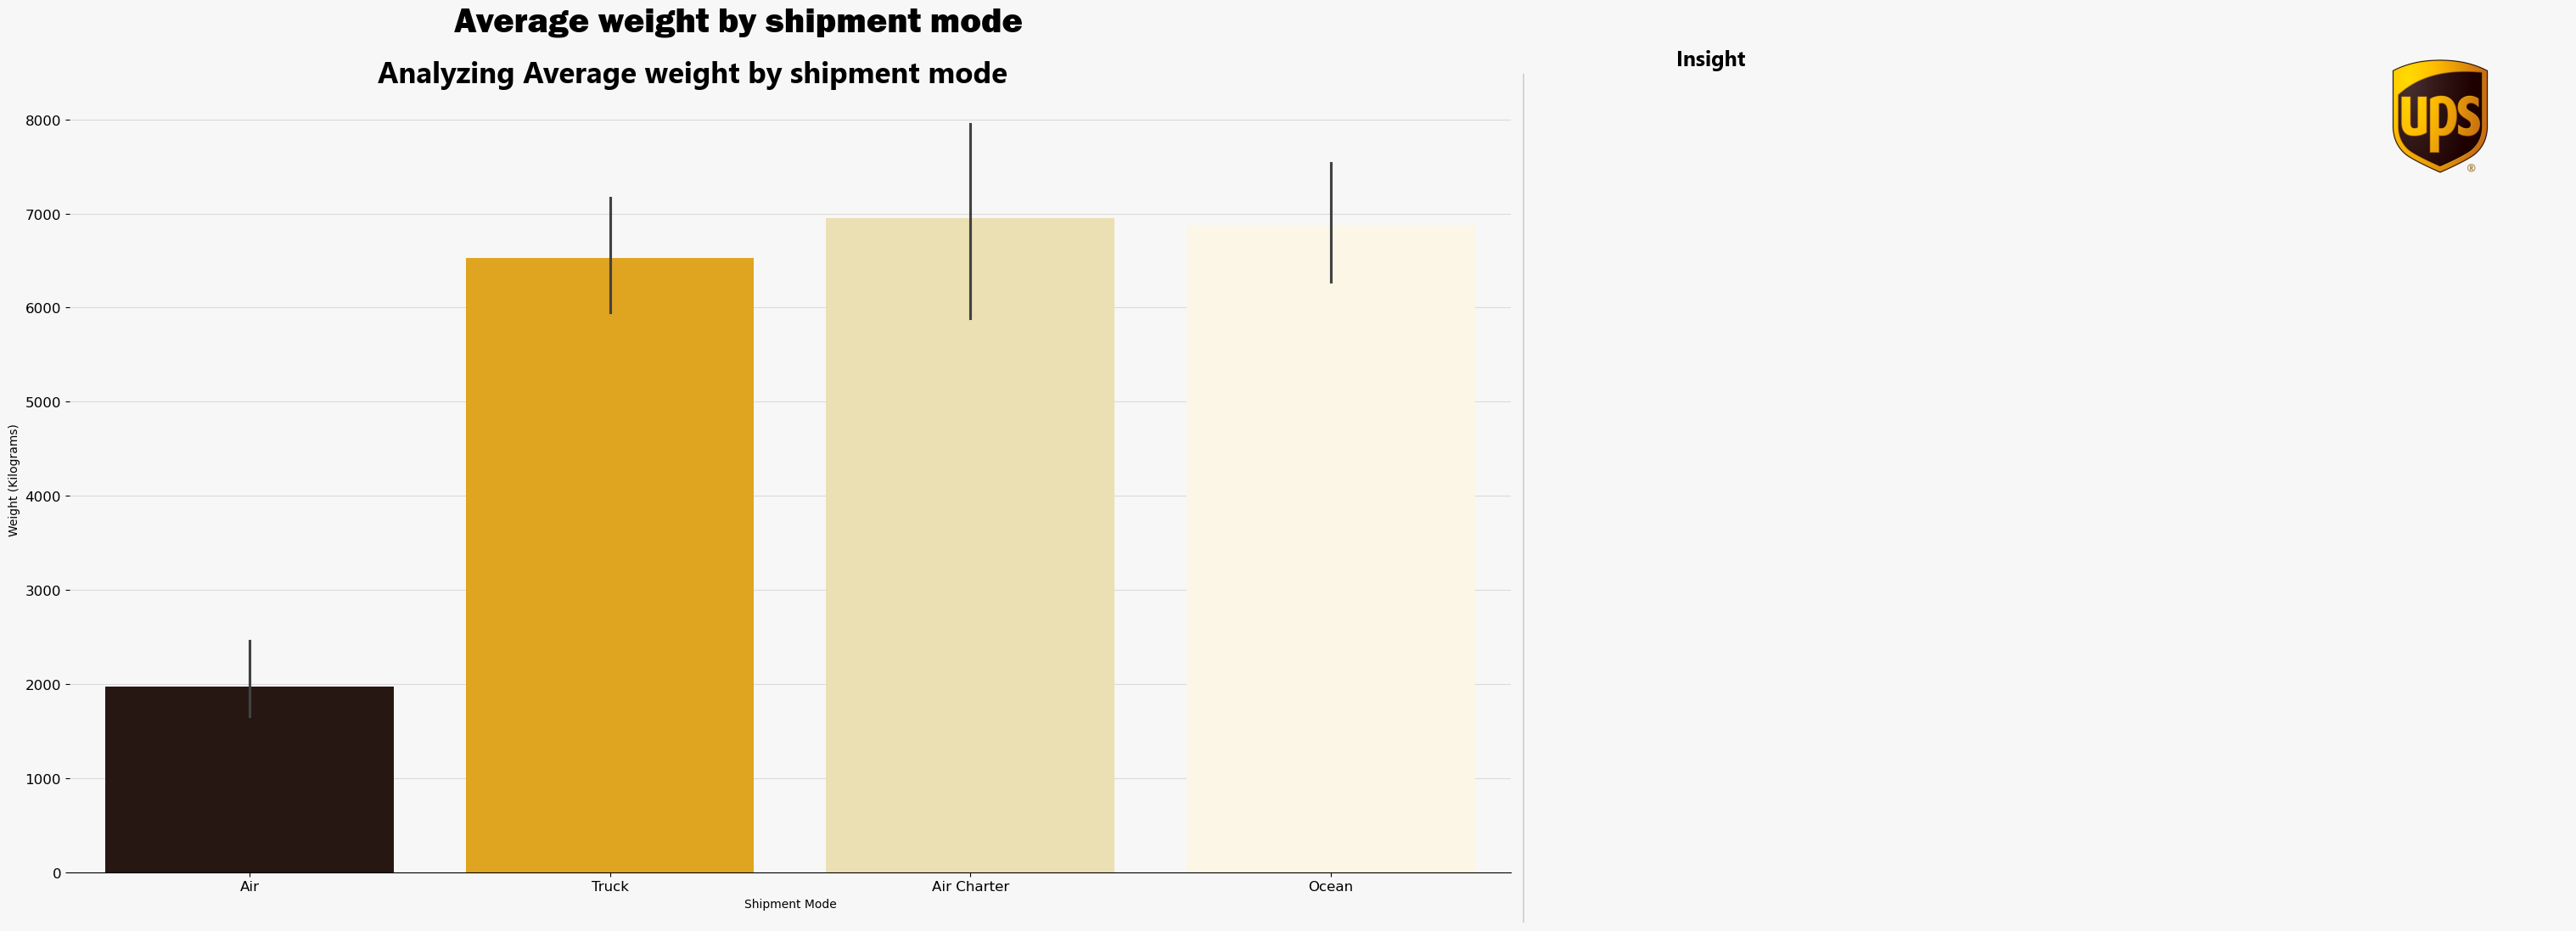

In [325]:
# Plottting bar graph 
fig,ax=plt.subplots(1,1,figsize=(18,10))
sns.barplot(x='Shipment Mode',y='Weight (Kilograms)',estimator='mean',data=fed_ex,palette=palette)
# apply chart Styling
apply_chart_styling(ax=ax,fig=fig,title="Average weight by shipment mode",subtitle="Analyzing Average weight by shipment mode",insight_text='''''')
plt.tight_layout()
plt.show()

### Average Delivery Delays by Shipment Mode

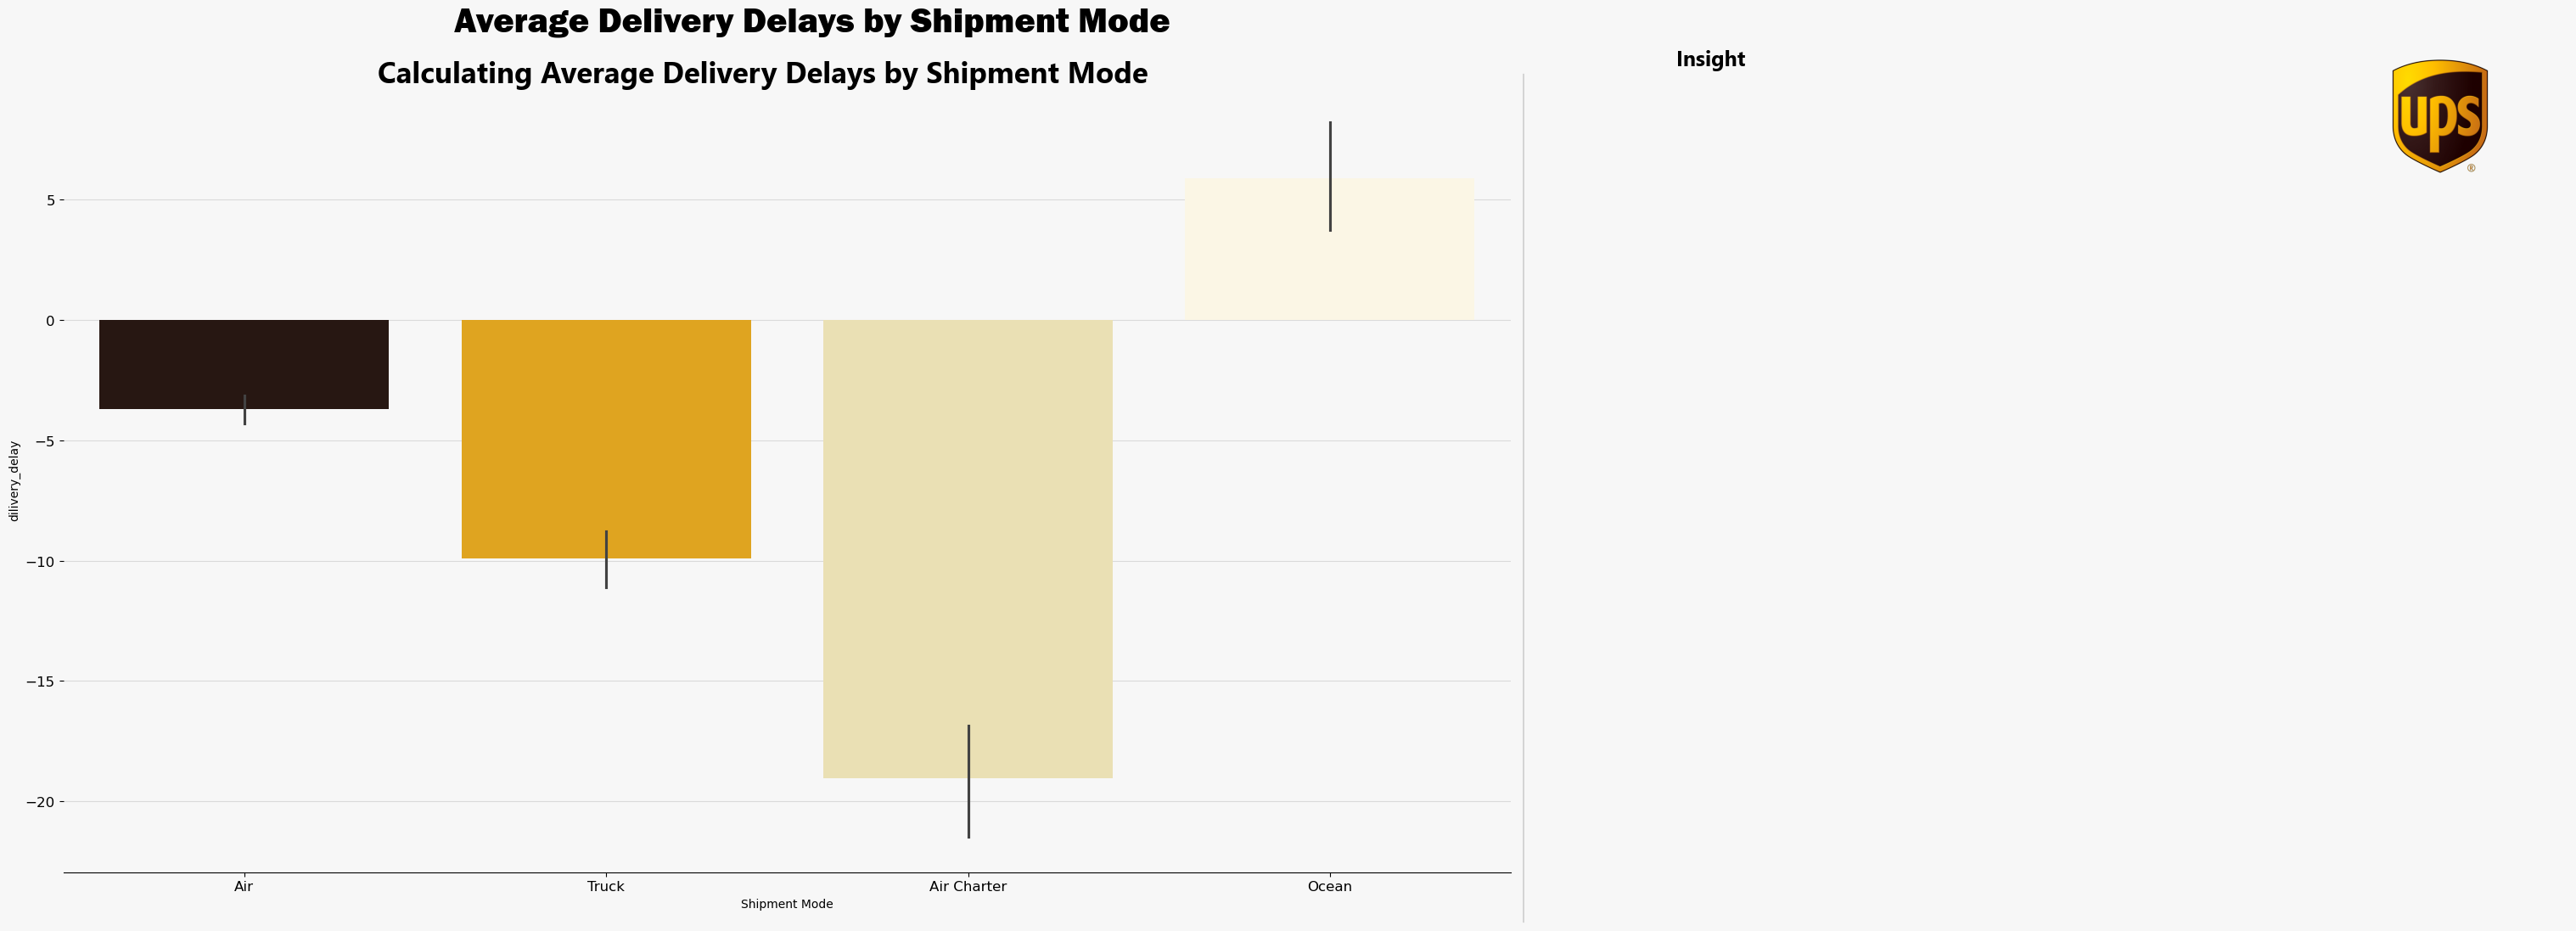

In [330]:
# calculating delivery delay in days
fed_ex["dilivery_delay"]=(fed_ex['Delivered to Client Date']-fed_ex['Scheduled Delivery Date']).dt.days

# plotting graph
fig,ax=plt.subplots(1,1,figsize=(18,10))
sns.barplot(x="Shipment Mode",y="dilivery_delay",data=fed_ex,palette=palette)
# apply styling
apply_chart_styling(ax=ax,fig=fig,title="Average Delivery Delays by Shipment Mode",subtitle="Calculating Average Delivery Delays by Shipment Mode",insight_text='''''')
plt.tight_layout()
plt.show()

### Total Shipments Over Time

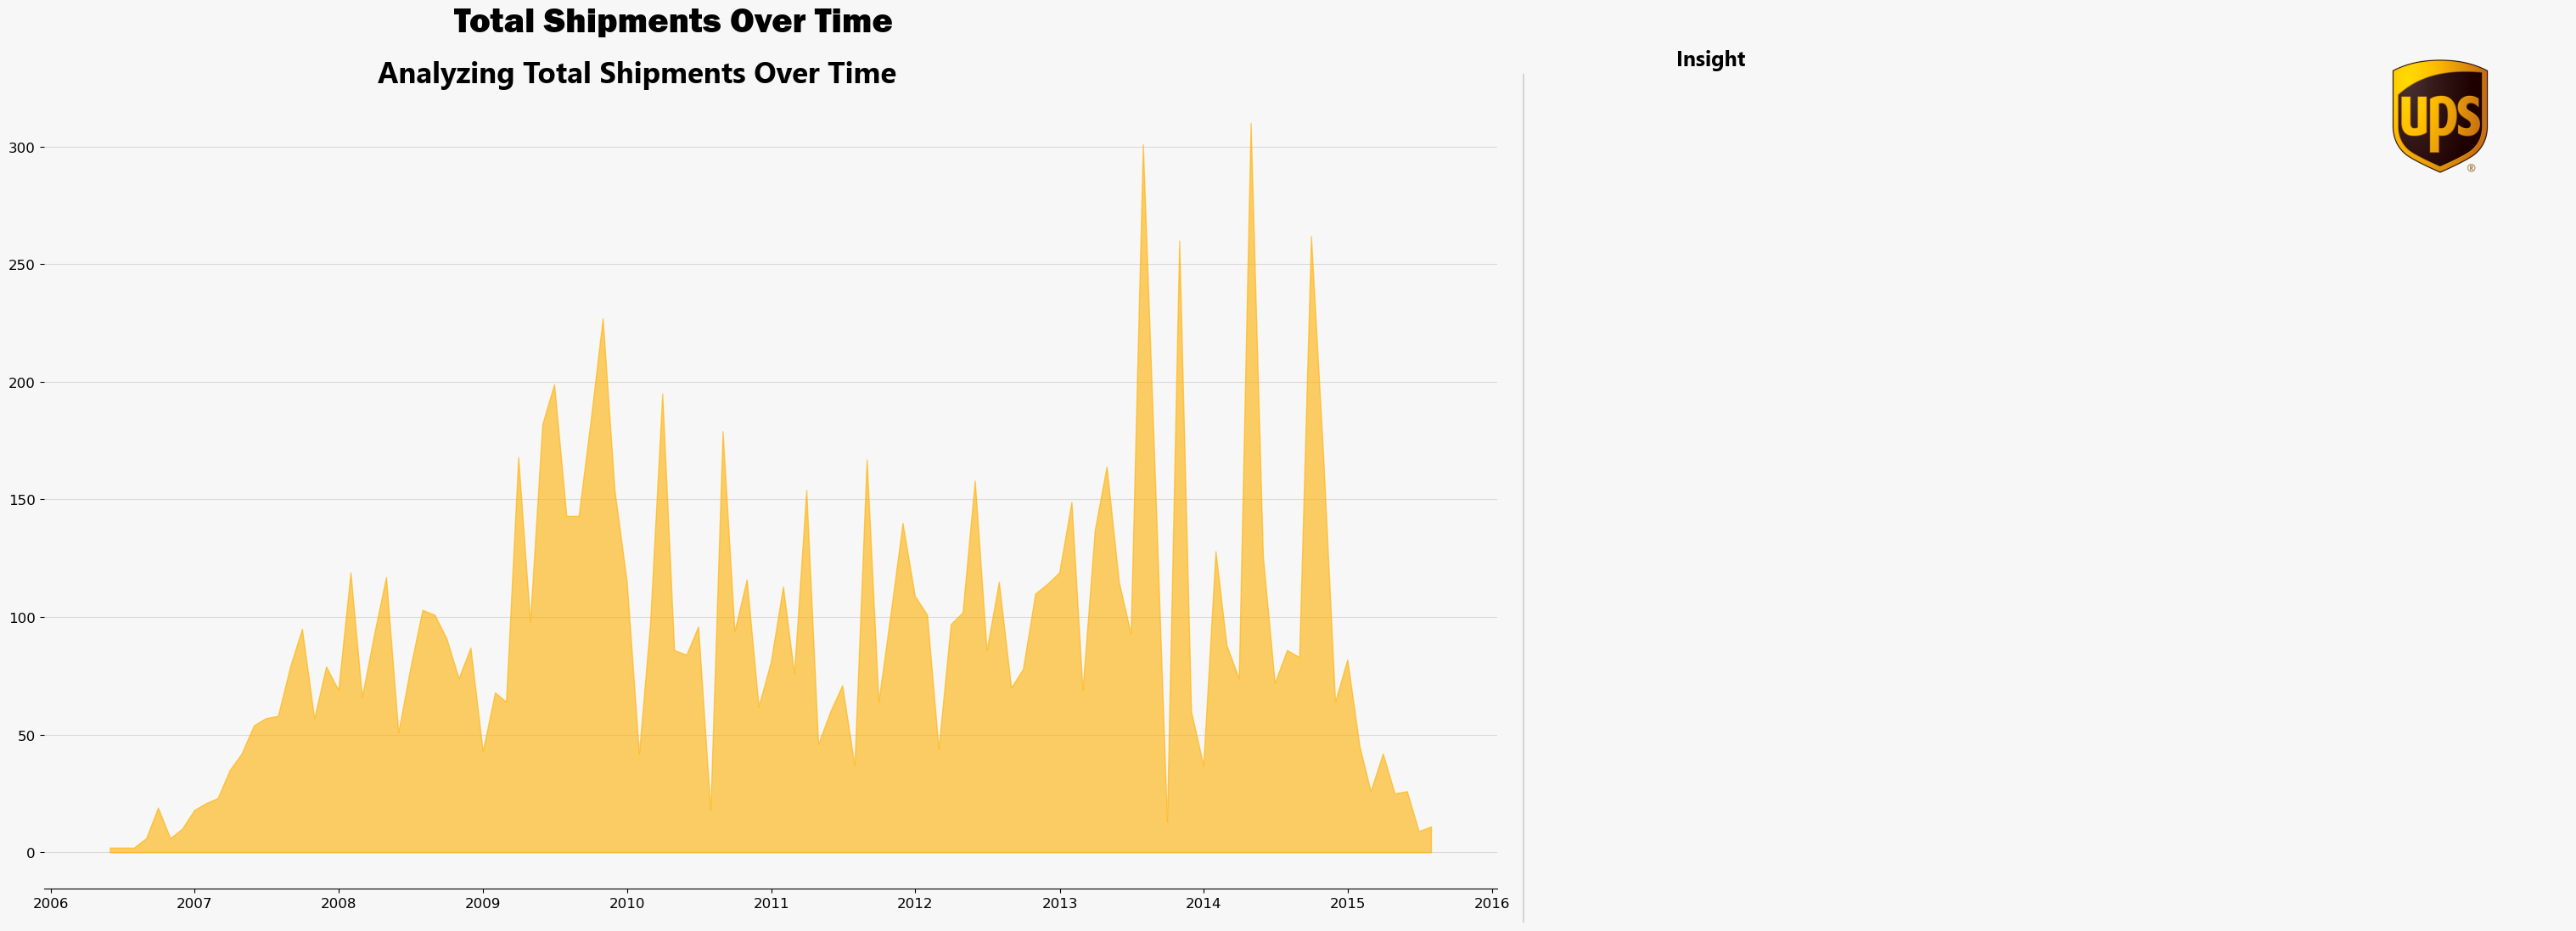

In [343]:
fed_ex["Shipment_Date"]=fed_ex['PQ First Sent to Client Date'].fillna(fed_ex[ 'Scheduled Delivery Date'])
shipments_over_time=fed_ex.resample('ME',on="Shipment_Date").size()
# creating graph structure
fig,ax=plt.subplots(1,1,figsize=(18,10))
# plotting graph
ax.fill_between(shipments_over_time.index, shipments_over_time.values, color="#FFB000", alpha=0.6)
# apply styling
apply_chart_styling(ax=ax,fig=fig,title="Total Shipments Over Time",subtitle="Analyzing Total Shipments Over Time",insight_text='''''')
plt.tight_layout()
plt.show()


### Line Of Items Across Diffrent Shipment Mode

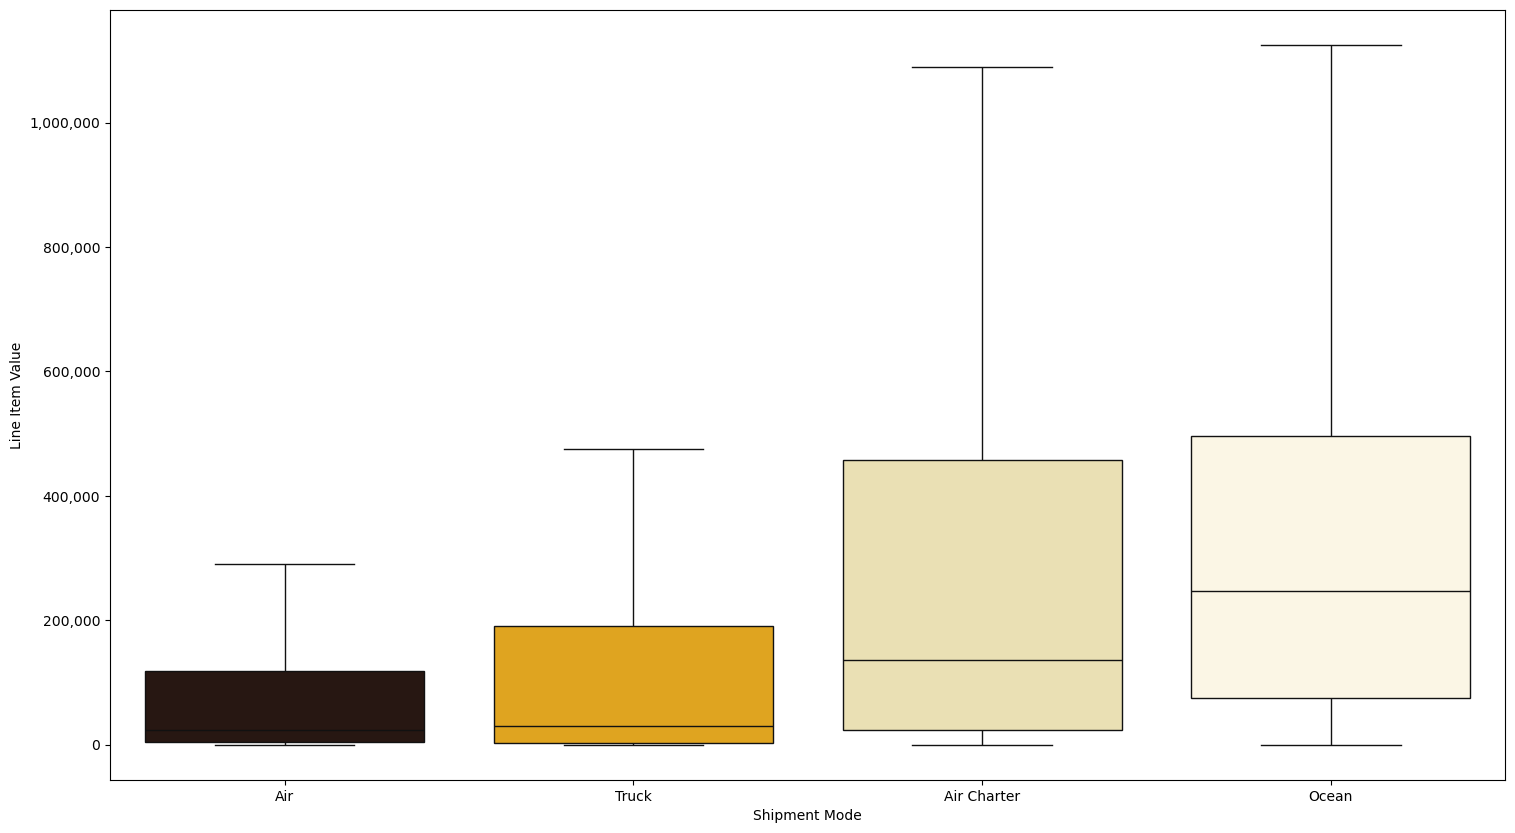

In [351]:
fig,ax=plt.subplots(1,1,figsize=(18,10))
sns.boxplot(x="Shipment Mode",y='Line Item Value',data=fed_ex,palette=palette,showfliers = False)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
# apply styling
apply_chart_styling(fig=fig,ax=ax,title="Line Of Items Across Diffrent Shipment Mode",subtitle="ALine Of Items Across Diffrent Shipment Mode

In [344]:
fed_ex.columns

Index(['Country', 'Managed By', 'Fulfill Via', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Line Item Quantity', 'Line Item Value',
       'Weight (Kilograms)', 'Freight Cost (USD)', 'Vendor',
       'Line Item Insurance (USD)', 'dilivery_delay', 'Shipment_Date'],
      dtype='object')